In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [2]:
def f(x, P, q):
    return 0.5 * x.T @ P @ x + q.T @ x + \
        np.log(np.exp(-2 * x[0]) + np.exp(-x[1]))
def grad_f(x, P, q):
    grad_quadratic = P @ x + q
    exp_terms = np.array([np.exp(-2 * x[0]), np.exp(-x[1])])
    grad_logarithmic = -np.array([2 * exp_terms[0], exp_terms[1]]) / \
        np.sum(exp_terms)
    return grad_quadratic + grad_logarithmic

In [3]:
def gradient_descent_exact_line_search(x0, P, q, tol=1e-2, max_iter=1000):
    xk = x0
    path = [xk]  # To store the sequence of solutions

    for _ in range(max_iter):
        grad = grad_f(xk, P, q)
        if np.linalg.norm(grad) < tol:
            break

        # Exact line search: minimize f(xk - alpha * grad)
        # Objective function for line search along direction -grad
        def phi(alpha):
            return f(xk - alpha * grad, P, q)
        
        # Approximate exact line search (find alpha that minimizes phi)
        alpha = minimize_scalar(phi).x

        # Update xk
        xk = xk - alpha * grad
        path.append(xk)
    
    return np.array(path)
# Gradient descent with backtracking line search
def gradient_descent_backtracking(x0, P, q, alpha_init=0.15, gamma=0.7, beta=0.8, tol=1e-2, max_iter=100000):
    xk = x0
    path = [xk]  # To store the sequence of solutions

    for _ in range(max_iter):
        grad = grad_f(xk, P, q)
        if np.linalg.norm(grad) < tol:
            break

        # Backtracking line search
        alpha = alpha_init
        while f(xk - alpha * grad, P, q) > f(xk, P, q) - gamma * alpha * np.dot(grad.T, grad):
            alpha *= beta

        # Update xk
        xk = xk - alpha * grad
        path.append(xk)
    
    return np.array(path)

In [4]:
P = np.array([[5.005, 4.995], [4.995, 5.005]])
# P = np.array([[3, 4], [4, 6]])
q = np.array([[-2], [4]])
x0 = np.array([[1, 2]]).T

In [5]:
# path = gradient_descent_exact_line_search(x0, P, q)
path = gradient_descent_backtracking(x0, P, q)

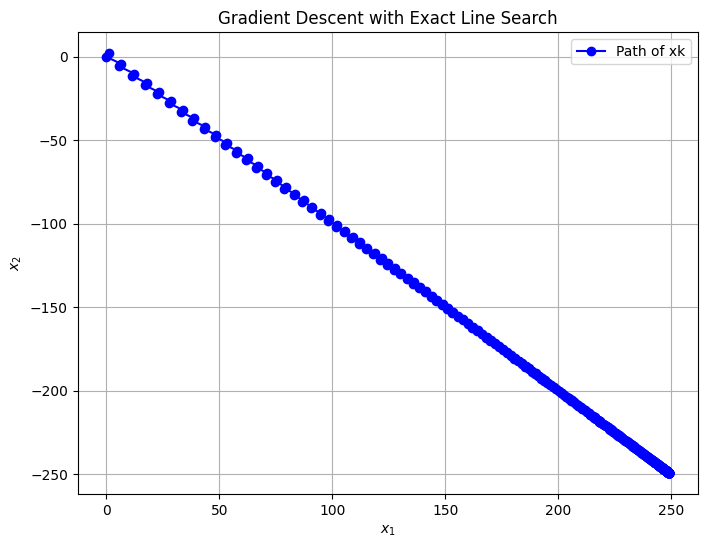

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(path[:, 0], path[:, 1], 'o-', color='blue',label="Path of xk")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
# plt.title('Gradient Descent with Backtracking Line Search')
plt.title('Gradient Descent with Exact Line Search')
plt.legend()
plt.grid()
plt.show()
# plt.savefig('Q2_1.png', dpi=600)

In [38]:
f(path[-1], P, q)

array([[-625.02028059]])